# SVM(Support Vector Machine)

#### 선형분리 / 비선형분리

In [ ]:
1. linear boundary의 svm
2. non-linear boundary의 SVM

In [3]:
import numpy as np
import pandas as pd
import random
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
loan_data = pd.read_csv(r'2022_BA_donghwanshin\data\loan_data.csv')

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            43386 non-null  int64  
 1   TOT_LOAN       43386 non-null  int64  
 2   TOT_LOAN_CRD   43386 non-null  int64  
 3   LOAN_BNK       43386 non-null  int64  
 4   LOAN_CPT       43386 non-null  int64  
 5   CRDT_CNT       43386 non-null  int64  
 6   GUARN_CNT      43386 non-null  int64  
 7   INCOME         43386 non-null  int64  
 8   LOAN_CRD_CNT   43386 non-null  int64  
 9   LATE_RATE      43386 non-null  int64  
 10  LATE_RATE_1Y   43386 non-null  int64  
 11  INS_MON_MAX    43386 non-null  float64
 12  CANCEL_CNT_1Y  43386 non-null  int64  
 13  CALL_TIME      43386 non-null  float64
 14  TEL_COST_MON   43386 non-null  int64  
 15  MOBILE_PRICE   43386 non-null  int64  
 16  SUSP_DAY       43386 non-null  int64  
 17  LATE_TEL       43386 non-null  int64  
 18  COMB_C

In [6]:
# one-hot encoding for SVM
loan_data = pd.get_dummies(data = loan_data, columns = ['SEX','PAY_METHOD','JOB'], prefix = ['SEX','PAY_METHOD','JOB'])

In [7]:
loan_data.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'TARGET', 'SEX_F',
       'SEX_M', 'PAY_METHOD_A', 'PAY_METHOD_B', 'PAY_METHOD_C', 'PAY_METHOD_D',
       'JOB_A', 'JOB_B', 'JOB_C', 'JOB_D'],
      dtype='object')

In [9]:
# data_x,y split
X = loan_data.drop('TARGET',axis=1)
y = loan_data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
!C값의 설명!
로버스트한 SVM을 위해, 노이즈가 있다고 생각하여 오차를 허용하고 hyperplane을 생성하는 방법이 사용됨
오차를 많이 허용할 수록, 소프트 마진
오차를 적게 허용할 수록, 하드 마진이라고 함

C가 클수록 적게 허용 --> 하드 마진

C가 작을수록 많이 허용 --> 소프트 마진


추가로, 커널을 사용하여 비선형성을 더하고, 비선형 바운더리로 데이터를 구분할 수 있게함

In [10]:
#### linearly separable SVM ####

In [11]:
# c=0
clf_sep = make_pipeline(StandardScaler(), SVC(kernel='linear',C=0.000000001))
clf_sep.fit(X_train, y_train)

y_pred = clf_sep.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

In [12]:
print(classification_report(y_true, y_pred, labels = clf_sep.classes_))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11769
           1       0.00      0.00      0.00      1247

    accuracy                           0.90     13016
   macro avg       0.45      0.50      0.47     13016
weighted avg       0.82      0.90      0.86     13016



C:\Users\ppuya\anaconda3\envs\jff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ppuya\anaconda3\envs\jff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ppuya\anaconda3\envs\jff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


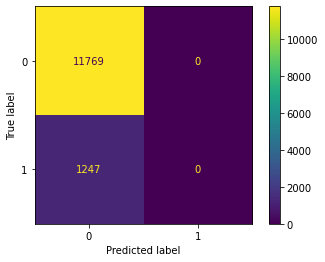

In [13]:
#test
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_sep.classes_)
disp.plot()

plt.show()

In [15]:
#### non-linear SVM ####

In [16]:
# Gausian(RBF;Radial Basis Function) kernel
clf_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf",C=2))
clf_rbf.fit(X_train, y_train)

y_pred = clf_rbf.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, labels = clf_rbf.classes_))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     11769
           1       0.68      0.23      0.35      1247

    accuracy                           0.92     13016
   macro avg       0.80      0.61      0.65     13016
weighted avg       0.90      0.92      0.90     13016



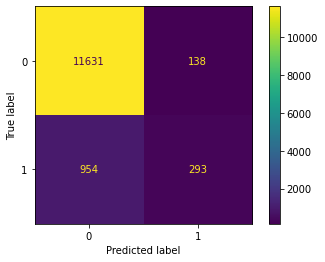

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rbf.classes_)
disp.plot()

plt.show()

In [ ]:
* 결과 해석
linear한 boundary를 가진 SVM에선, 라벨 1을 가진 값들까지도 전부 0으로 분류하는 것을 보면 비선형선을 띤다고 볼 수 있다.

따라서, non-linear한 boundary를 위해 Gausian(RBF) 커널을 SVM에 적용 하였을때, 라벨 1을 1로 분류하는 성능이 눈에 띠게 좋아짐을 알 수 있음

# SVR(Support Vector Regression)

#### (데이터는 scikit-learn에서 제공하는 boston housing데이터 사용)

In [ ]:
1. SVR에선, 데이터들의 정규화가 필요함
2. SVR학습(fit)
3. 결과값 비교

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline

In [26]:
# boston housing dataset load
boston = load_boston()

In [29]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
# c=0
clf_sep = make_pipeline(StandardScaler(), SVC(kernel='linear',C=0.000000001))
clf_sep.fit(X_train, y_train)

y_pred = clf_sep.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

In [32]:
X, y = boston.data, boston.target

# data_x,y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
# Gausian(RBF) kernel
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(gamma='auto'))])

In [48]:
# R-squared for training evaluation
score = svr.score(X_train, y_train)
print("R-squared: ", score)

R-squared:  0.6635306750304195


In [49]:
# predict
y_pred = svr.predict(X_test)

In [50]:
# mse
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  27.847063766924432


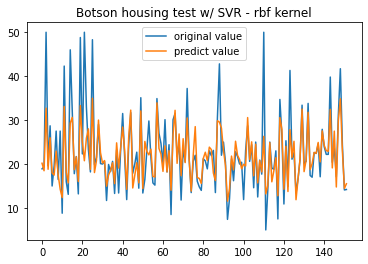

In [51]:
# plot
x__ax = range(len(y_test))
plt.plot(x__ax, y_test, label='original value')
plt.plot(x__ax, y_pred, label="predict value")
plt.title("Botson housing test w/ SVR - rbf kernel")
plt.legend()
plt.show()

In [41]:
# polynomial kernel
svr = make_pipeline(StandardScaler(), SVR(kernel='poly', gamma='auto'))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(gamma='auto', kernel='poly'))])

In [42]:
# R-squared for training evaluation
score = svr.score(X_train, y_train)
print("R-squared: ", score)

R-squared:  0.6823961507383017


In [43]:
# predict
y_pred = svr.predict(X_test)

In [44]:
# mse
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  30.71774414590945


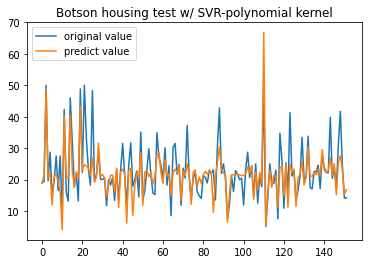

In [46]:
# plot
x__ax = range(len(y_test))
plt.plot(x__ax, y_test, label='original value')
plt.plot(x__ax, y_pred, label="predict value")
plt.title("Botson housing test w/ SVR - polynomial kernel")
plt.legend()
plt.show()

In [ ]:
*결과해석
SVR(Support Vector Regression)은 linear하지 않는 data들에 대해서, 가우시안 커널등을 사용해 비선형성을 띠는 데이터를 회귀분석하기에
적합하다. 

위 그래프에서도 볼 수 있듯이, 비선형성을 위해 kernel을 추가해, 큰 추세를 벗어나지 않고 예측하는 하는 것을 볼 수 있음